In [13]:
# some imports
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle
import os
import gzip
import json
import matplotlib.pyplot as plt



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
cachefile = "./dataset_fast.cache"
X_train, y_train, X_valid, y_valid = pickle.load(gzip.open(cachefile, 'rb'))

In [15]:
print(X_train.shape)
print(X_valid.shape)

(40500, 96, 96)
(4500, 96, 96)


In [21]:
# stats - how are the actions distributed?
for i in range(5):
    print("action", i, "num samples", len(y_train[y_train[:,i] == 1]) + len(y_valid[y_valid[:,i] == 1]))

action 0 num samples 22006
action 1 num samples 7330
action 2 num samples 3455
action 3 num samples 10558
action 4 num samples 1651


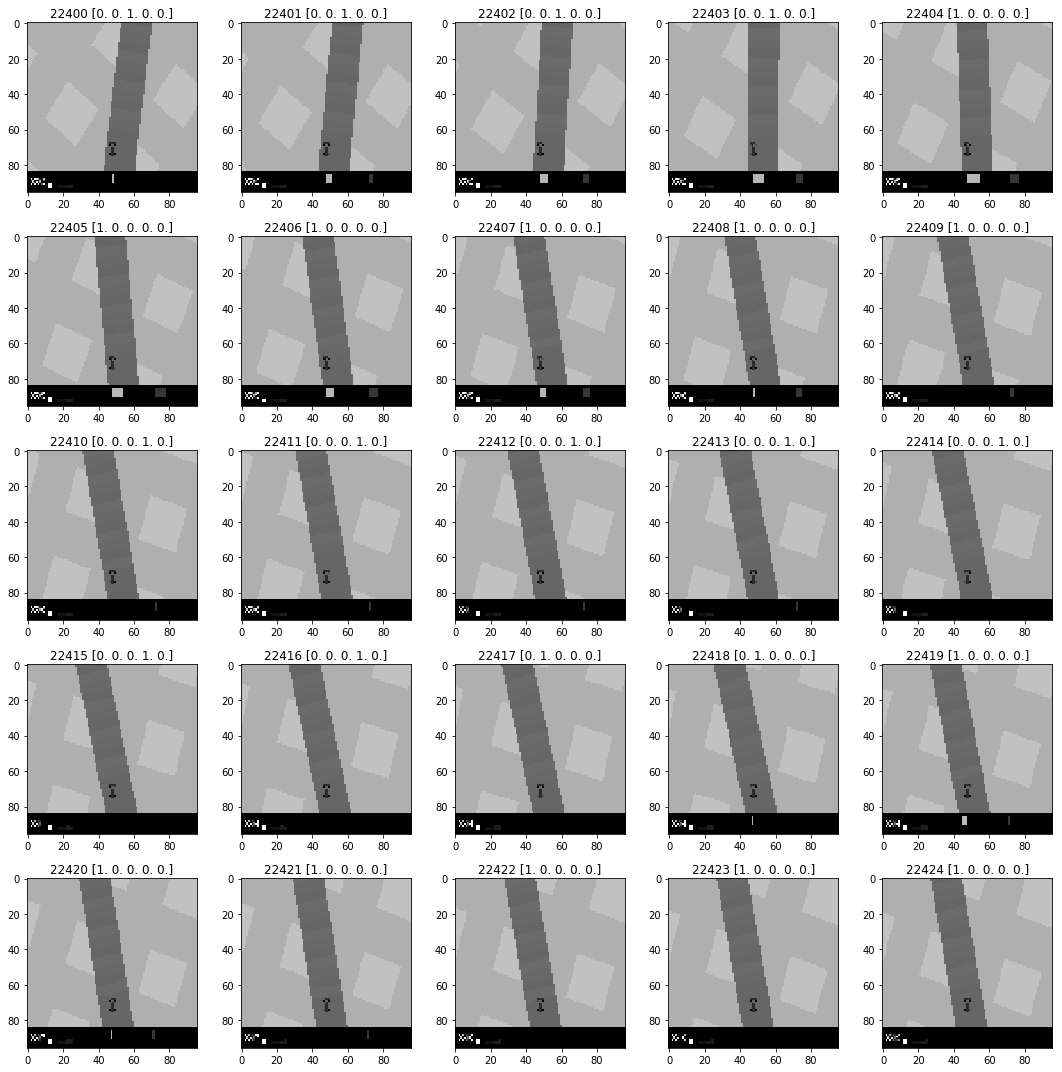

In [17]:
# code for inspecting dataset

plt.figure(figsize=(15,15))

offset = 22400

n = 5
for i in range(n*n):
    plt.subplot(n,n,i+1)
    plt.gca().set_title(str(i+offset)+" "+str(y_train[i+offset]))
    plt.imshow(X_train[i+offset].reshape(96, 96), cmap='gray')

plt.tight_layout()

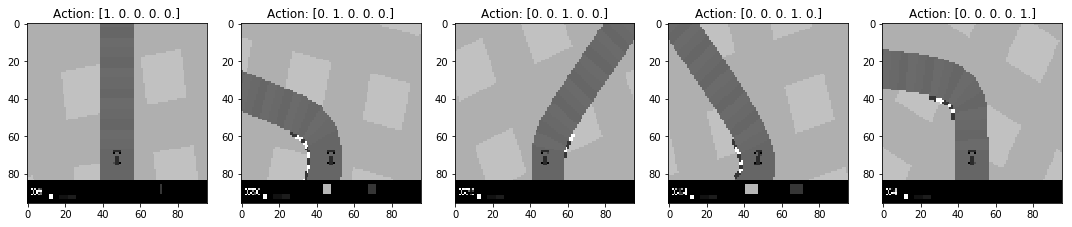

In [18]:
# handpicked examples for different actions - example figure for paper
plt.figure(figsize=(15,15))

for i, index in enumerate([3921,3403,22372,22494,22464]):
    plt.subplot(1,5,i+1)
    plt.gca().set_title("Action: "+str(y_train[index]))
    plt.imshow(X_train[index].reshape(96, 96),  cmap='gray')

plt.tight_layout()

In [19]:
# calculate stats of expert recordings for paper
# scores from json files
expert_scores = [
    903.5999999999898, 915.099999999992, 906.5999999999834, 895.9999999999791, 899.799999999979,
    915.0999999999843, 926.4999999999925, 909.5999999999849, 900.4999999999782, 895.2999999999793,
    916.0999999999934, 906.4999999999792, 908.1999999999842, 915.7999999999838, 903.0999999999806,
    903.799999999979, 909.8999999999836, 914.6999999999805, 903.6999999999802, 911.8999999999825,
    916.8999999999864, 915.69999999999, 893.6999999999832, 916.1999999999827, 916.3999999999876,
    919.0999999999871, 912.0999999999915, 921.2999999999868, 927.8999999999919, 928.1999999999854, 896.999999999982,
    920.4999999999839, 903.5999999999843, 915.6999999999923, 922.7999999999932, 916.6999999999931,
    924.7999999999934, 919.5999999999935, 928.8999999999927, 912.0999999999912, 920.2999999999881, 918.8999999999861,
    913.8999999999915, 899.3999999999794, 913.9999999999811, 928.2999999999955, 924.7999999999895, 927.8999999999851
]

print("Episodes:", len(expert_scores))
print("Mean:", np.mean(expert_scores))
print("Std.:", np.std(expert_scores))


Episodes: 48
Mean: 913.3020833333197
Std.: 9.60354729565011


In [20]:
# code for creating a movie of the training + validation data

import matplotlib.animation as animation
import numpy as np
from pylab import *

all = np.concatenate([X_train, X_valid])


def create_animation():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    im = ax.imshow(all[300],cmap='gray')
    fig.set_size_inches([3,3])

    fig.tight_layout()


    def update_img(n):
        if n % 1000 == 0:
            print(n)
        tmp = all[n]

        im.set_data(tmp)
        return im

    #legend(loc=0)
    ani = animation.FuncAnimation(fig,update_img,45000,interval=30)
    writer = animation.writers['ffmpeg'](fps=30)

    ani.save('input.mp4',writer=writer,dpi=dpi)
    return ani

# uncomment this to run movie production, requires ffmpeg, takes several minutes
# create_animation()